<a href="https://colab.research.google.com/github/audreysiqiliu/Visual-Search-Patterns/blob/main/Search%20Strategy%20Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ts and Ls Burnout Test Data - Private Pilot 2
Goals:
1. check for odd file configurations

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import json
import os
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.lines import Line2D
from matplotlib.colors import to_rgba

from IPython.display import HTML

from scipy.stats import norm

Make dataframe from all .json files in the data directory.

In [ ]:
# For Colab (not using now)
    # # Mount google drive
    # drive.mount('/content/drive')
    # data_dir = '/content/drive/My Drive/Data Analyses/Ts-and-Ls_Burnout/Ts-and-Ls_Burnout_private_pilot_1' # requires shortcut to MTurkify Ts & Ls in My Drive

# Load data files from directory
data_dir = '/Users/audreyliu/Library/CloudStorage/GoogleDrive-audrey.liu@email.gwu.edu/My Drive/Data Analyses/Ts-and-Ls_Burnout/Ts-and-Ls_Burnout_private_pilot_2'
json_files = [f for f in os.listdir(data_dir) if f.endswith('.json')]

# List to hold data from all participants
all_data = []

# Iterate over each file in the directory
for filename in os.listdir(data_dir):
    if filename.endswith('.json'):
        with open(os.path.join(data_dir, filename), 'r') as f:
            data = json.load(f)

            # Extract experimentDuration and expTrialsDuration
            experiment_duration = data.get('experimentDuration', None)
            exp_trials_duration = data.get('expTrialsDuration', None)

            # Add these values to each trial's data
            for trial in data['trialDataLog']:
                trial['experimentDuration'] = experiment_duration
                trial['expTrialsDuration'] = exp_trials_duration
                trial['subjectId'] = data['subjectId']  # Also adding subjectId for reference
                all_data.append(trial)

# Convert the list of dictionaries to a DataFrame
raw_df = pd.DataFrame(all_data)

# View dataframe
raw_df.head()

,logCounter,iBlock,iTrial,trialType,setSize,totalSearchTime,timeoutReached,prematurePresses,hitCount,faCount,missCount,stimuli,allClicks,mouseTrajectory,experimentDuration,expTrialsDuration,subjectId
0,0,0,1,target_absent,18,11152,False,0,0,0,0,"[{""stimIndex"":0,""xpos"":366,""ypos"":412,""rgb"":""r...","[{""x"":400.79998779296875,""y"":300.1999969482422...","[{""x"":0,""y"":0,""time"":51,""speed"":0},{""x"":0,""y"":...",773039,479226,403059
1,1,0,2,target_absent,12,7804,False,0,0,0,0,"[{""stimIndex"":0,""xpos"":365,""ypos"":183,""rgb"":""r...",[],"[{""x"":399.79998779296875,""y"":300.1999969482422...",773039,479226,403059
2,2,0,3,target_present,12,4242,False,0,1,0,0,"[{""stimIndex"":0,""xpos"":195,""ypos"":335,""rgb"":""r...","[{""x"":208.79998779296875,""y"":334.1999969482422...","[{""x"":399.79998779296875,""y"":300.1999969482422...",773039,479226,403059
3,3,0,4,target_absent,24,10450,False,0,0,0,0,"[{""stimIndex"":0,""xpos"":112,""ypos"":417,""rgb"":""r...",[],"[{""x"":372.79998779296875,""y"":260.1999969482422...",773039,479226,403059
4,4,0,5,target_present,24,6609,False,0,1,0,0,"[{""stimIndex"":0,""xpos"":687,""ypos"":490,""rgb"":""r...","[{""x"":684.7999877929688,""y"":492.1999969482422,...","[{""x"":372.79998779296875,""y"":260.1999969482422...",773039,479226,403059


Show the total number of participants and create filtered_df containing only participants with valid experiment durations (those who completed the whole experiment).

In [ ]:
# List of exceptions: subjectIds to exclude for unspecified reasons
exceptions = []

# Filter out the exceptions
df = raw_df[~raw_df['subjectId'].isin(exceptions)]

# Total number of participants
total_participants = raw_df['subjectId'].nunique()

# Number of participants with valid experimentDuration
df = raw_df.dropna(subset=['experimentDuration', 'expTrialsDuration']).copy()
participants_with_valid_durations = df['subjectId'].nunique()

print(f"Total participants: {total_participants}")
print(f"Participants with valid experiment durations: {participants_with_valid_durations}")

Total participants: 6
Participants with valid experiment durations: 6


Calculating the time in minutes and seconds that each participant spent on instructions + practice and on the experiment trials.

In [ ]:
def convert_to_min_sec(time_in_minutes):
    minutes = int(time_in_minutes)
    seconds = int((time_in_minutes - minutes) * 60)
    return f"{minutes}m {seconds}s"

# Calculate the time spent on instructions and practice trials
df.loc[:, 'instruction_and_practice_duration'] = (df['experimentDuration'] - df['expTrialsDuration']) / 60000  # Convert to minutes

# Group by subjectId to get the unique duration for each participant
instruction_durations = df.groupby('subjectId')['instruction_and_practice_duration'].first()
exp_trials_durations = df.groupby('subjectId')['expTrialsDuration'].first() / 60000  # Convert to minutes

# Convert to minutes and seconds format
instruction_durations = instruction_durations.apply(convert_to_min_sec)
exp_trials_durations = exp_trials_durations.apply(convert_to_min_sec)

# Calculate mean times
mean_instruction_and_practice = df['instruction_and_practice_duration'].mean()
mean_exp_trials = (df['expTrialsDuration'] / 60000).mean()  # Convert to minutes

# Convert the means to minutes and seconds format
mean_instruction_and_practice_str = convert_to_min_sec(mean_instruction_and_practice)
mean_exp_trials_str = convert_to_min_sec(mean_exp_trials)

# Print the mean times
print(instruction_durations)
print(f"Mean time spent on instructions and practice trials: {mean_instruction_and_practice_str}")

print(exp_trials_durations)
print(f"Mean time spent on experiment trials: {mean_exp_trials_str}")

subjectId
297549    3m 15s
403059    4m 53s
665180    2m 14s
707253     4m 2s
711033    2m 15s
849255    2m 50s
Name: instruction_and_practice_duration, dtype: object
Mean time spent on instructions and practice trials: 3m 15s
subjectId
297549    7m 18s
403059    7m 59s
665180     7m 4s
707253    8m 58s
711033    8m 14s
849255    8m 11s
Name: expTrialsDuration, dtype: object
Mean time spent on experiment trials: 7m 57s


On average participants took **x m x s** on instructions and 6 practice trials, and **x m x s** on 54 experimental trials.

**Each experimental trial took x seconds on average.**

## Total Search Time Vis.

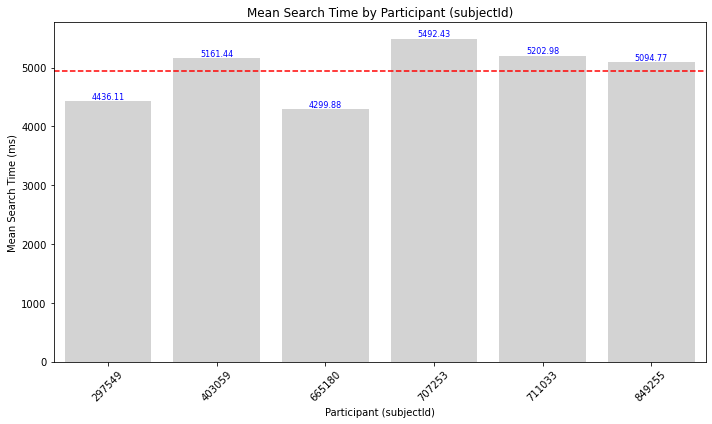

In [ ]:
# Calculate the mean search time for each participant
mean_search_times = df.groupby('subjectId')['totalSearchTime'].mean().reset_index()

# Calculate the overall mean search time across all participants
mean = mean_search_times['totalSearchTime'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_search_times, x='subjectId', y='totalSearchTime', color='lightgray')
plt.axhline(mean, color='red', linestyle='--')  # Added a horizontal line for the overall mean

# Add text labels for mean values
for i, row in mean_search_times.iterrows():
    plt.text(i, row['totalSearchTime'], f"{row['totalSearchTime']:.2f}", ha='center', va='bottom', color='blue', fontsize=8)

plt.title('Mean Search Time by Participant (subjectId)')
plt.ylabel('Mean Search Time (ms)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.xlabel('Participant (subjectId)')
plt.tight_layout()  # Adjust layout for better label visibility
plt.show()

In [ ]:
print(mean)

4947.933333333333


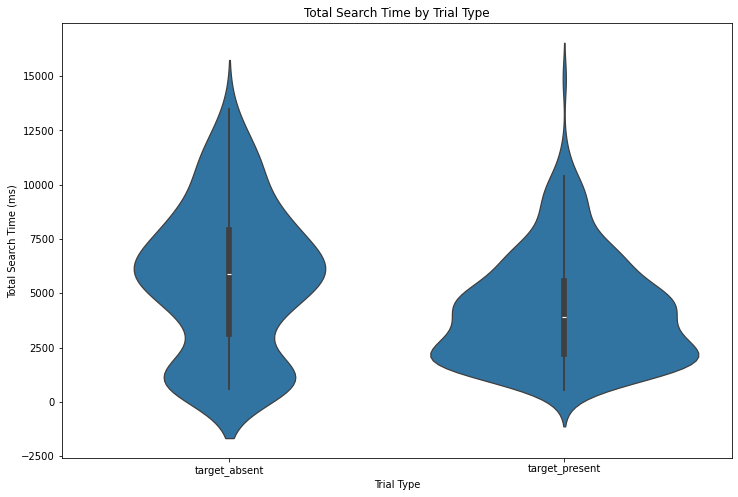

In [ ]:
# Calculate means and standard deviations for each group
means = df.groupby(['trialType', 'subjectId'])['totalSearchTime'].mean().reset_index()

# Create a violin plot for each trial typ
plt.figure(figsize=(12, 8))
ax = sns.violinplot(data=df, x='trialType', y='totalSearchTime')

plt.title('Total Search Time by Trial Type')
plt.ylabel('Total Search Time (ms)')
plt.xlabel('Trial Type')
plt.show()

### VS Slopes: Search Times by Set Size

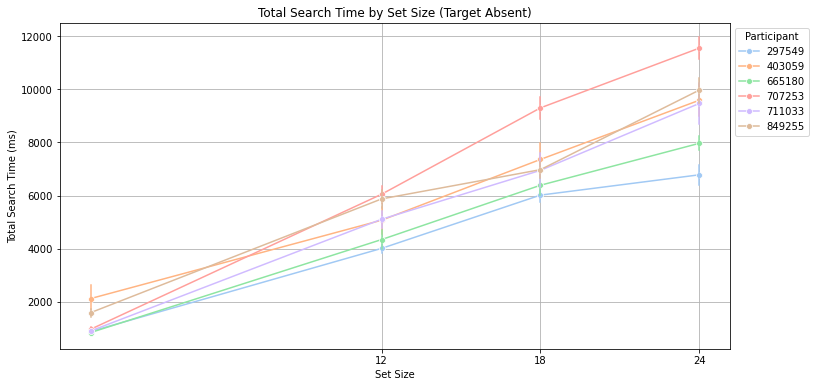

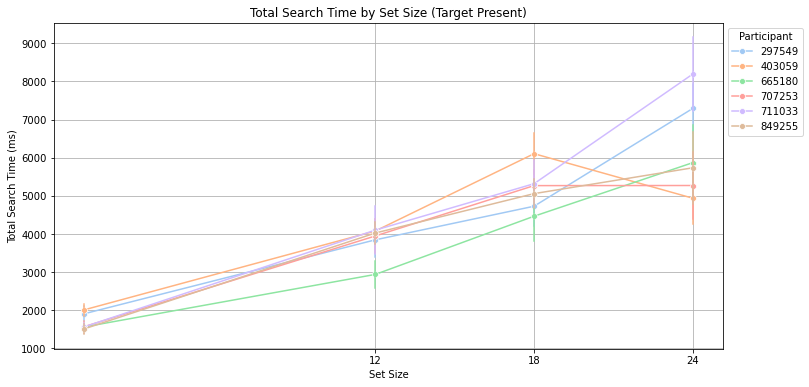

In [ ]:
# Filter data for target absent trials
df_absent = df[df["trialType"] == "target_absent"]

# Create a separate plot for target absent trials
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_absent, x='setSize', y='totalSearchTime', hue='subjectId', marker='o', palette = 'pastel', errorbar = "se",err_style='bars')
plt.title('Total Search Time by Set Size (Target Absent)')
plt.xlabel('Set Size')
plt.ylabel('Total Search Time (ms)')
plt.legend(title='Participant', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

# Set custom x-axis ticks for specific "set size" values
plt.xticks([12, 18, 24])

# Filter data for target present trials
df_present = df[df["trialType"] == "target_present"]

# Create a separate plot for target present trials
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_present, x='setSize', y='totalSearchTime', hue='subjectId', marker='o', palette = 'pastel', errorbar = "se",err_style='bars')
plt.title('Total Search Time by Set Size (Target Present)')
plt.xlabel('Set Size')
plt.ylabel('Total Search Time (ms)')
plt.legend(title='Participant', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

# Set custom x-axis ticks for specific "set size" values
plt.xticks([12, 18, 24])

plt.show()

## Performance Metrics Vis: Hits, Misses, FAs

/var/folders/q4/x7gqsh7j05l2nbssrpvk8z_40000gn/T/ipykernel_24342/1279749938.py:36: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.tight_layout()
/var/folders/q4/x7gqsh7j05l2nbssrpvk8z_40000gn/T/ipykernel_24342/1279749938.py:36: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.tight_layout()
/var/folders/q4/x7gqsh7j05l2nbssrpvk8z_40000gn/T/ipykernel_24342/1279749938.py:36: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.tight_layout()


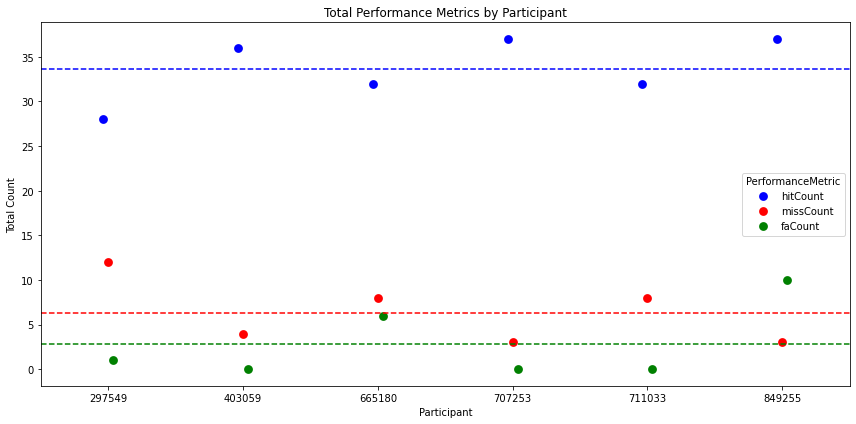

In [ ]:
# Compute the total (sum) for each participant for each performance metric
participant_totals = df.groupby(['subjectId']).agg({
    'hitCount': 'sum',
    'missCount': 'sum',
    'faCount': 'sum'
}).reset_index()

# Calculate the average totals across participants for hits, misses, and false alarms for comparison
average_total_hits = participant_totals['hitCount'].mean()
average_total_misses = participant_totals['missCount'].mean()
average_total_false_alarms = participant_totals['faCount'].mean()

# Melt the DataFrame for plotting
df_long = participant_totals.melt(id_vars=['subjectId'],
                                  value_vars=['hitCount', 'missCount', 'faCount'],
                                  var_name='PerformanceMetric', value_name='TotalCount')

# Create a point plot for each performance metric
plt.figure(figsize=(12, 6))
palette_dict = {
    'hitCount': 'blue',
    'missCount': 'red',
    'faCount': 'green'
}

sns.pointplot(data=df_long, x='subjectId', y='TotalCount', hue='PerformanceMetric',
              palette=palette_dict, dodge=True, linestyle='none', markers="o")
plt.title('Total Performance Metrics by Participant')
plt.xlabel('Participant')
plt.ylabel('Total Count')

plt.axhline(average_total_hits, color=palette_dict['hitCount'], linestyle='--', label='Average Total Hits')
plt.axhline(average_total_misses, color=palette_dict['missCount'], linestyle='--', label='Average Total Misses')
plt.axhline(average_total_false_alarms, color=palette_dict['faCount'], linestyle='--', label='Average Total False Alarms')

plt.tight_layout()
plt.show()

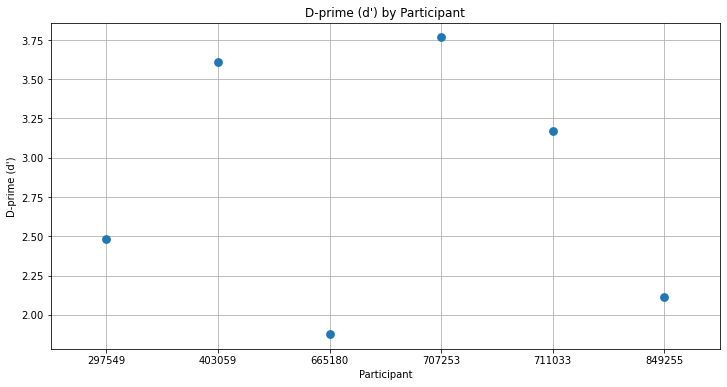

In [ ]:
# Group the data by 'subjectId' and calculate the necessary columns
grouped_df = df.groupby('subjectId').agg(
    hitCount=('hitCount', 'sum'),
    faCount=('faCount', 'sum'),
    targetPresentCount=('trialType', lambda x: (x == 'target_present').sum()),
    targetAbsentCount=('trialType', lambda x: (x == 'target_absent').sum())
).reset_index()

# Calculate Hit Rate (HR) and False Alarm Rate (FAR) for each participant
grouped_df['HR'] = grouped_df['hitCount'] / grouped_df['targetPresentCount']
grouped_df['FAR'] = grouped_df['faCount'] / grouped_df['targetAbsentCount']

# To handle potential zeros or ones which will cause issues when z-scoring with norm.ppf()
grouped_df['HR'] = grouped_df['HR'].clip(0.01, 0.99)
grouped_df['FAR'] = grouped_df['FAR'].clip(0.01, 0.99)

# Calculate d-prime (d') for each participant
grouped_df['d_prime'] = norm.ppf(grouped_df['HR']) - norm.ppf(grouped_df['FAR'])

# Create a single d-prime plot for all participants
plt.figure(figsize=(12, 6))
sns.pointplot(data=grouped_df, x='subjectId', y='d_prime', linestyle='none')
plt.title("D-prime (d') by Participant")
plt.xlabel("Participant")
plt.ylabel("D-prime (d')")
plt.grid(True)

plt.show()


In [ ]:
# Check resolution of mouseTrajectory

# average number of entries per trial and per second across all trials

# Total number of entries in mouseTrajectory across all trials
total_entries = df['mouseTrajectory'].apply(lambda x: len(json.loads(x))).sum()

# Total number of trials
total_trials = len(df)

# Average number of entries per trial
avg_entries_per_trial = total_entries / total_trials

# Compute the average number of entries per second
total_time_seconds = df['totalSearchTime'].sum() / 1000  # Convert to seconds
avg_entries_per_second = total_entries / total_time_seconds

avg_entries_per_trial, avg_entries_per_second


(97.16041666666666, 19.636565434726958)

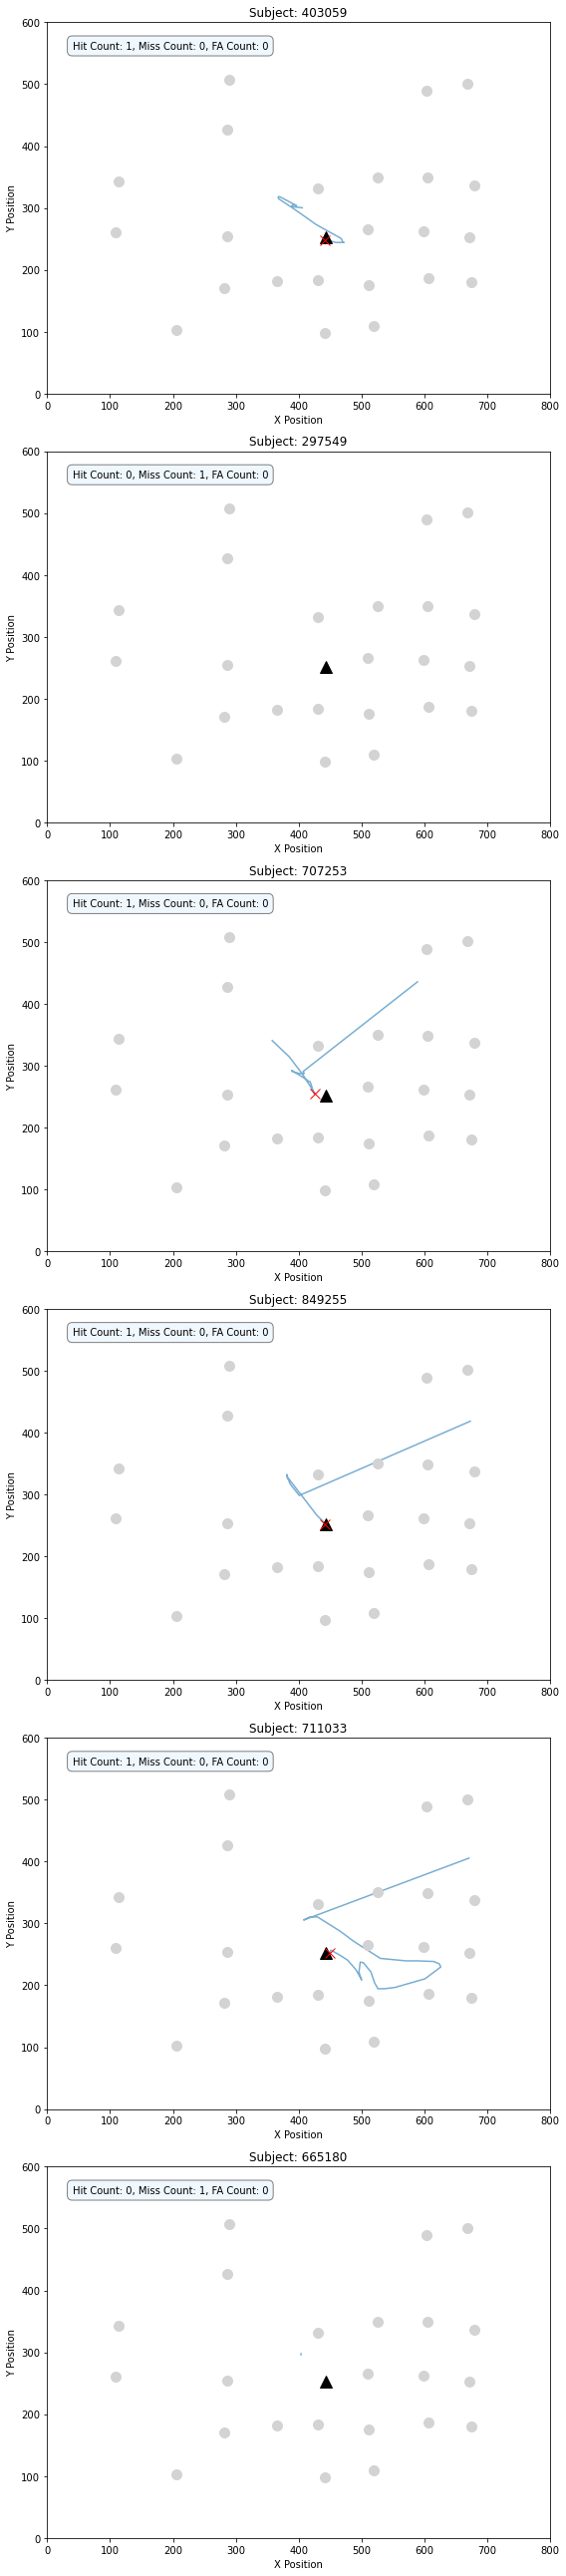

In [ ]:
import matplotlib.pyplot as plt
import json

# Filter dataframe for block 1 and trial 2
filtered_df = df[(df['iBlock'] == 1) & (df['iTrial'] == 13)]

# Plotting trajectories for each subject separately with target, distractor positions, and click locations
fig, axes = plt.subplots(nrows=len(filtered_df), figsize=(8, 6*len(filtered_df)))

for ax, (_, row) in zip(axes, filtered_df.iterrows()):
    trajectory = json.loads(row['mouseTrajectory'])
    x = [point['x'] for point in trajectory]
    y = [point['y'] for point in trajectory]
    ax.plot(x, y, alpha=0.6)

    # Check the type of stimuli
    if isinstance(row['stimuli'], list):
        stimuli = row['stimuli']
    else:
        try:
            stimuli = json.loads(row['stimuli'])
        except json.JSONDecodeError:
            print(f"Failed to parse stimuli for subject {row['subjectId']}")
            continue

    for stim in stimuli:
        # If the stimulus is a target
        if stim['targetCond'] == 1:
            ax.plot(stim['xpos'], stim['ypos'], '^k', markersize=12)  # Black triangle
        # If the stimulus is a distractor
        else:
            ax.plot(stim['xpos'], stim['ypos'], 'o', color='lightgray', markersize=10)  # Light gray dot

    # Plotting click locations
    for click in json.loads(row['allClicks']):
        # color = 'red' if click['correct'] else 'green'
        ax.plot(click['x'], click['y'], 'x', color='red', markersize=10)

    label_text = f"Hit Count: {row['hitCount']}, Miss Count: {row['missCount']}, FA Count: {row['faCount']}"
    ax.text(0.05, 0.95, label_text, transform=ax.transAxes, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', edgecolor='grey', facecolor='aliceblue'))

    ax.set_title(f"Subject: {row['subjectId']}")
    ax.set_xlabel("X Position")
    ax.set_ylabel("Y Position")
    ax.invert_yaxis()  # Invert y-axis to match typical screen coordinates

    ax.set_xlim(0, 800)
    ax.set_ylim(0, 600)
plt.tight_layout()
plt.show()

# Selection bias effects?
  # direction of first move is biased by angle of the previous target biases current mouse movement
  # zero or 90 could be the current target location
# acceleration towards the target


## Click Location Vis.

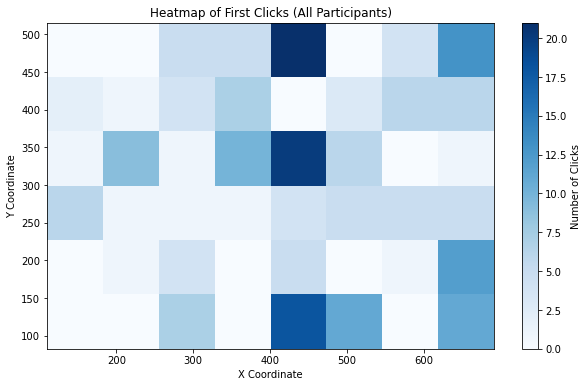

In [ ]:
# Function to safely evaluate the string
def safe_eval(s):
    if not s:
        return None
    s = s.replace('false', 'False').replace('true', 'True').replace('null', 'None')
    return eval(s)

# Assuming df['allClicks'] contains the click data and the first click is the first entry
# Extracting the x, y coordinates of the first click for each participant
df['first_click_x'] = df['allClicks'].apply(lambda x: safe_eval(x)[0]['x'] if safe_eval(x) else None)
df['first_click_y'] = df['allClicks'].apply(lambda x: safe_eval(x)[0]['y'] if safe_eval(x) else None)

# 1. Heatmap for All Participants Together
plt.figure(figsize=(10, 6))
plt.hist2d(df['first_click_x'].dropna(), df['first_click_y'].dropna(), bins=(8, 6), cmap='Blues')
plt.colorbar(label='Number of Clicks')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Heatmap of First Clicks (All Participants)')
plt.show()

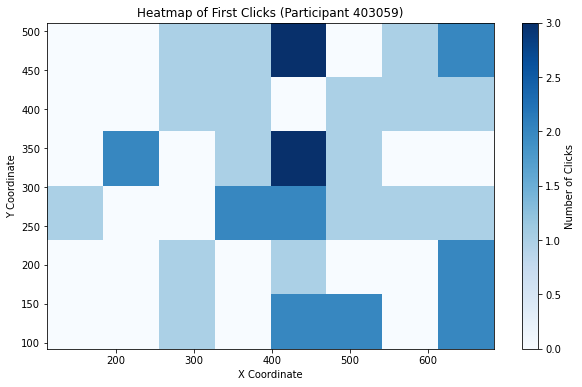

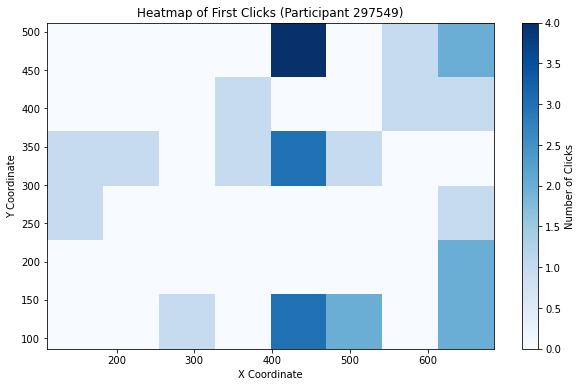

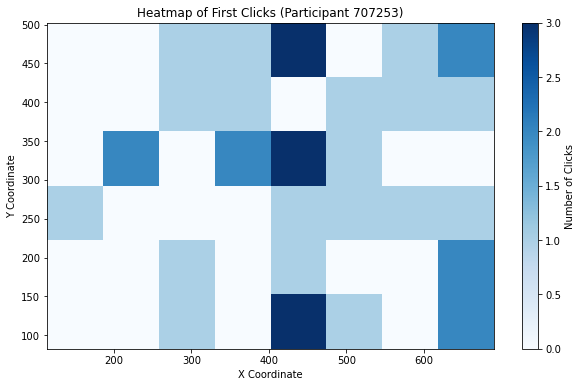

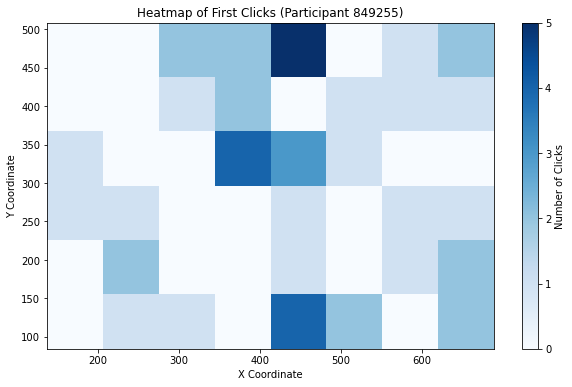

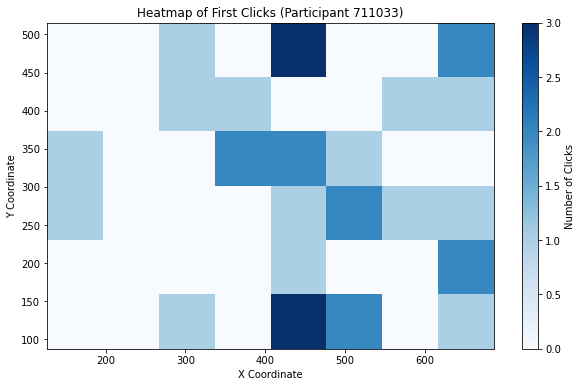

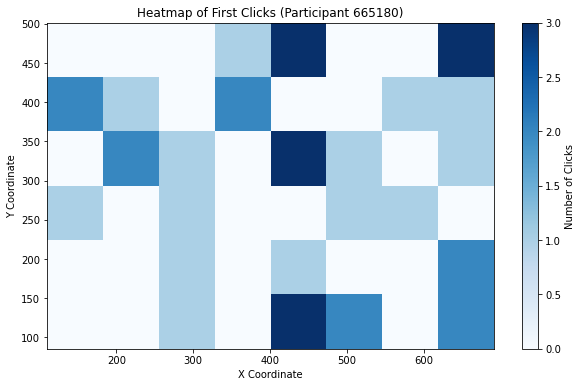

In [ ]:
# 2. Heatmap for Each Participant Separately
unique_participants = df['subjectId'].unique()

for participant in unique_participants:
    participant_data = df[df['subjectId'] == participant]

    # Check if there are valid clicks for the participant
    if not np.isnan(participant_data['first_click_x']).all() and not np.isnan(participant_data['first_click_y']).all():
        plt.figure(figsize=(10, 6))
        plt.hist2d(participant_data['first_click_x'].dropna(),
                  participant_data['first_click_y'].dropna(),
                  bins=(8, 6), cmap='Blues')
        plt.colorbar(label='Number of Clicks')
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.title(f'Heatmap of First Clicks (Participant {participant})')
        plt.show()